In [2]:
from transformers import GPT2LMHeadModel

/home/developer/nn_zero2hero/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = GPT2LMHeadModel.from_pretrained('gpt2') #124M param
sd_hf = model.state_dict()

for key, value in sd_hf.items():
    print(key, value.shape)


transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

transformer.wte.weight torch.Size([50257, 768]) #LUT for tokens

50257 tokens. Each token has a 768 dimensional embedding

transformer.wpe.weight torch.Size([1024, 768]) #LUT for positions

1024 context window. Each position has a 768 dimensional embedding


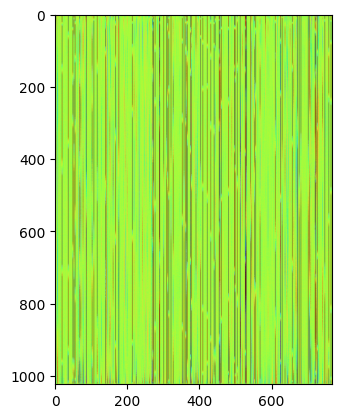

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf['transformer.wpe.weight'], cmap="turbo", vmin=-0.1, vmax=0.1)

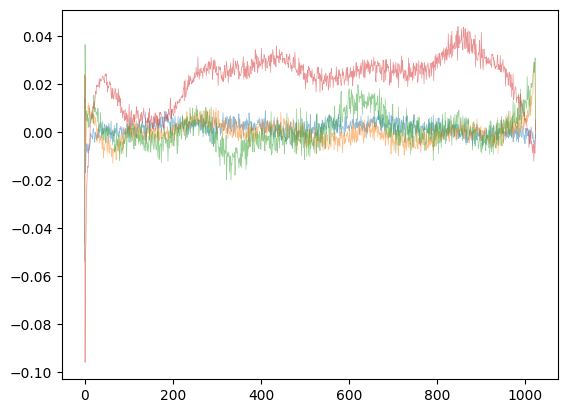

In [ ]:
c=100
plt.plot(sd_hf['transformer.wpe.weight'][:,c], linewidth=0.5, alpha=0.5)
c=c+50
plt.plot(sd_hf['transformer.wpe.weight'][:,c], linewidth=0.5, alpha=0.5)
c=c+50
plt.plot(sd_hf['transformer.wpe.weight'][:,c], linewidth=0.5, alpha=0.5)
c=c+50
plt.plot(sd_hf['transformer.wpe.weight'][:,c], linewidth=0.5, alpha=0.5)


# a bit noisy, so not fully trained

# in gpt1 positional embedding are fixes to sines and cosines but in gpt2 its fully learned fron random 

In [15]:
from transformers import pipeline, set_seed

generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Guybrush : Hi! My name's Guybrush Threepwood, and I want", max_length=30, num_return_sequences=5)

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Guybrush : Hi! My name's Guybrush Threepwood, and I want to chat about the story of some wonderful characters in The Legend"},
 {'generated_text': "Guybrush : Hi! My name's Guybrush Threepwood, and I want to give a talk about two of your projects, Nails"},
 {'generated_text': "Guybrush : Hi! My name's Guybrush Threepwood, and I want to share my journey behind the scenes with you! I have"},
 {'generated_text': "Guybrush : Hi! My name's Guybrush Threepwood, and I want to introduce you to our new partner in crime, a great"},
 {'generated_text': "Guybrush : Hi! My name's Guybrush Threepwood, and I want to share some awesome new things with you all. The idea"}]